In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

votes = pd.read_csv('114_congress.csv')
print(votes.head())

        name party state    1    4    5    6    7    8    9   10   20   26  \
0  Alexander     R    TN  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
1     Ayotte     R    NH  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0   
2    Baldwin     D    WI  1.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0   
3   Barrasso     R    WY  0.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0   
4     Bennet     D    CO  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0   

    32   38   39   44   47  
0  0.0  0.0  0.0  0.0  0.0  
1  0.0  1.0  0.0  1.0  0.0  
2  1.0  1.0  0.0  1.0  1.0  
3  0.0  0.0  1.0  0.0  0.0  
4  0.0  1.0  0.0  1.0  0.0  


In the US, the Senate votes on proposed legislation. Getting a bill passed by the Senate is a key step towards getting its provisions enacted. A majority vote is required to get a bill passed.

The results of these votes, known as roll call votes.

Senators typically vote in accordance with how their political party votes, known as voting along party lines. In the US, the 2 main political parties are the Democrats, who tend to be liberal, and the Republicans, who tend to be conservative. Senators can also choose to be unaffiliated with a party, and vote as Independents, although very few choose to do so.

114_congress.csv contains all of the results of roll call votes from the 114th Senate. Each row represents a single Senator, and each column represents a vote. A 0 in a cell means the Senator voted No on the bill, 1 means the Senator voted Yes, and 0.5 means the Senator abstained.

Clustering voting data of Senators is particularly interesting because it can expose patterns that go deeper than party affiliation. For example, some Republicans are more liberal than the rest of their party. Looking at voting data can help us discover the Senators who are more or less in the mainstream of their party.

In [2]:
print(votes['party'].value_counts())

R    54
D    44
I     2
Name: party, dtype: int64


From the above output we can see that out of the 100 senator entries we have, 54 belong to the Republican Party, 44 belong to the Democratic Party and 2 are Independent.

In [3]:
print(votes.mean())

1     0.325
4     0.575
5     0.535
6     0.945
7     0.545
8     0.415
9     0.545
10    0.985
20    0.525
26    0.545
32    0.410
38    0.480
39    0.510
44    0.460
47    0.370
dtype: float64


Just the mean values for each columns indicating that if the mean value is less than 0.5, the bill was rejected or if greater than 0.5 then was accepted.

In [5]:
from sklearn.metrics.pairwise import euclidean_distances

print(euclidean_distances(votes.iloc[0,3:].reshape(1,-1),votes.iloc[1,3:].reshape(1,-1)))

[[ 1.73205081]]


Here, to calculate the distance between any 2 rows, we are using Euclidean Distance as our metric using the sklearn.metrics package.

In [8]:
from sklearn.cluster import KMeans

kmeans_model = KMeans(n_clusters=2,random_state=1)
senator_distances = kmeans_model.fit_transform(votes.iloc[:,3:])
print(senator_distances[0:3])

[[ 3.12141628  1.3134775 ]
 [ 2.6146248   2.05339992]
 [ 0.33960656  3.41651746]]


K-means clustering uses Euclidean distance to form clusters of similar Senators. 

The k-means algorithm will group Senators who vote similarly on bills together, in clusters. Each cluster is assigned a center, and the Euclidean distance from each Senator to the center is computed. Senators are assigned to clusters based on which one they are closest to. From our background knowledge, we think that Senators will cluster along party lines.

The k-means algorithm requires us to specify the number of clusters upfront. Because we suspect that clusters will occur along party lines, and the vast majority of Senators are either Republicans or Democrats, we'll pick 2 for our number of clusters.

In [9]:
labels = kmeans_model.labels_
print(pd.crosstab(labels,votes['party']))

party   D  I   R
row_0           
0      41  2   0
1       3  0  54


We can use the Pandas method crosstab() to compute and display how many Senators from each party ended up in each cluster. The crosstab() method takes in two vectors or Pandas Series and computes how many times each unique value in the second vector occurs for each unique value in the first vector.

It looks like both of our clusters mostly broke down along party lines. The first cluster contains 41 Democrats, and both Independents. The second cluster contains 3 Democrats, and 54 Republicans.

No Republicans seem to have broken party ranks to vote with the Democrats, but 3 Democrats are more similar to Republicans in their voting than their own party. Let's explore these 3 in more depth so we can figure out why that is.

In [11]:
democratic_outliers = votes[(labels == 0) & (votes['party'] == 'D')]
print(democratic_outliers.head())

         name party state    1    4    5    6    7    8    9   10   20   26  \
2     Baldwin     D    WI  1.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0   
4      Bennet     D    CO  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0   
5  Blumenthal     D    CT  1.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0   
7      Booker     D    NJ  1.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0   
9       Boxer     D    CA  0.5  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0   

    32   38   39   44   47  
2  1.0  1.0  0.0  1.0  1.0  
4  0.0  1.0  0.0  1.0  0.0  
5  1.0  1.0  0.0  1.0  1.0  
7  1.0  1.0  0.0  1.0  1.0  
9  1.0  1.0  0.0  1.0  1.0  


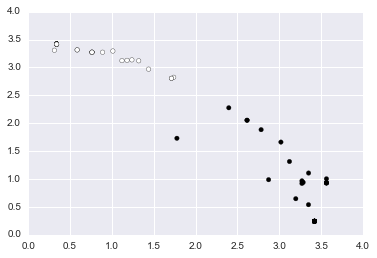

In [12]:
plt.scatter(senator_distances[:,0],senator_distances[:,1],c=labels)
plt.show()

One great way to explore clusters is to visualize them using matplotlib. Earlier, we computed a senator_distances array that shows the distance from each Senator to the center of each cluster. We can treat these distances as x and y coordinates, and make a scatterplot that shows the position of each Senator. This works because the distances are relative to the cluster centers.

The most extreme Senators are those who are the furthest away from one cluster. For example, a radical Republican would be as far from the Democratic cluster as possible. Senators who are in between both clusters are more moderate, as they fall in between the views of the two parties.

In [14]:
senator_distances = senator_distances ** 3
extremism = np.sum(senator_distances,axis=1)
votes['extremism'] = extremism
votes.sort_values('extremism',ascending=False,inplace=True)
print(votes.head(10))

        name party state    1    4    5    6    7    8    9   10   20   26  \
98    Wicker     R    MS  0.0  1.0  1.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0   
53  Lankford     R    OK  0.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  1.0   
26      Cruz     R    TX  0.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  1.0   
80     Sasse     R    NE  0.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  1.0   
69      Paul     R    KY  0.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  1.0   
86    Shelby     R    AL  0.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0   
33   Fischer     R    NE  0.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0   
34     Flake     R    AZ  0.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0   
91    Tillis     R    NC  0.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0   
90     Thune     R    SD  0.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0   

     32   38   39   44   47     extremism  
98  0.0  0.0  1.0  0.0  0.0  92601.491488  
53  0.0  0.0  1.0  0.0  0.0  92600.986786  
26  0.0  

The above output shows the top 10 most extreme senators. We have customized a formula for finding the extremism within the voting patterns for a senator by cubing every value in senator_distances and then adding values in each row to get the "extremism" score for each senator.